## Gaussian smoothing:


We multiply the image in Fourier space times a Nd-Gaussian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gausssian mask:

$$f(x,y) = A \exp\left(-\left(\frac{(x - x_0)^2}{2\sigma_X^2} + \frac{(y - y_0)^2}{2\sigma_Y^2} \right)\right)$$

In [2]:
def mask_gaussian(x, y, sigma_x, sigma_y):
    """
    Function to get the 2D gaussian
    """
    
    return (1/(2*np.pi*sigma_x*sigma_y) *\
            np.exp(-(x**2/(2*sigma_x**2) \
                   + y**2/(2*sigma_y**2))))

### Grid:

In [40]:
# We select the sigmas 
sigma_x = 0.1
sigma_y = 0.1

# We generate the vectors
x = np.linspace(-10, 10, 1600)  # Define x coordinates
y = np.linspace(-10, 10, 1600)  # Define y coordinates

# We create the meshgrid
X, Y = np.meshgrid(x, y)

# For the surface
Z = mask_gaussian(X, Y, sigma_x, sigma_y)



/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/766774345.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(Z), shading='auto', cmap ="viridis")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/766774345.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


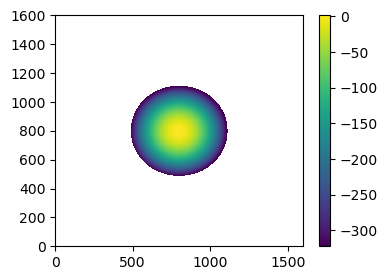

In [41]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(Z), shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/2397797605.py:3: RuntimeWarning: divide by zero encountered in log10
  surf = ax.plot_surface(X, Y, np.log10(Z), cmap ="viridis", clim= (-20, 0))


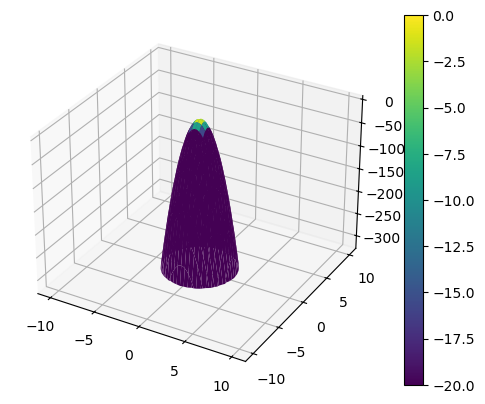

In [42]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, np.log10(Z), cmap ="viridis", clim= (-20, 0))
fig.colorbar(surf)

plt.show()

In [43]:
import matplotlib.image as mpimg


In [44]:
# Read image:

img = mpimg.imread("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Teaching_Arxiv/physics-teaching-data/2D-data/Rubiks_cube.jpg")
print(img.shape)

# 2D image:

image_3 = img[:,:,0]
print(image_3.shape)

(1600, 1600, 3)
(1600, 1600)


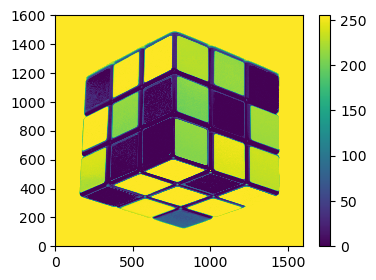

In [45]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(image_3, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### Fourier analysis:

In [46]:
fourier_3 = np.fft.fft2(image_3)

shifted_fourier_3 = np.fft.fftshift(fourier_3)

mask_3 = np.fft.fft2(Z)

shifted_mask_3 = np.fft.fftshift(mask_3)

### Fourier transform of the image:

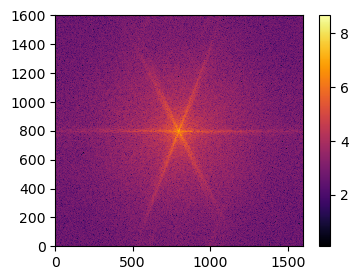

In [47]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(np.abs(shifted_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Fourier transform of the Gaussian mask:

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/704405869.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(shifted_mask_3)), shading='auto', cmap ="inferno")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/704405869.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


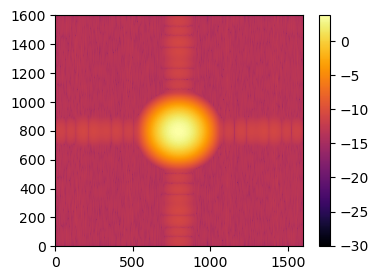

In [48]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(np.abs(shifted_mask_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Multiply the mask by fourier image:

In [49]:
masked_3 = shifted_fourier_3*shifted_mask_3

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/2091601249.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_3)), shading='auto', cmap ="inferno")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_85745/2091601249.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


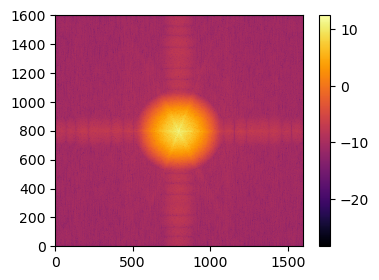

In [50]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(np.abs(masked_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Inverse Fourier transform:


In [51]:
inv_filter_3 = np.fft.ifftshift(masked_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

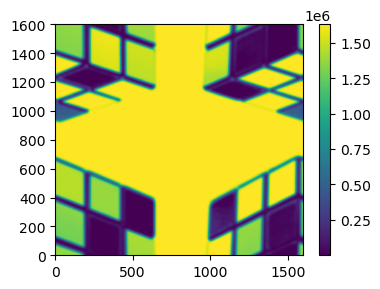

In [52]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### Rolling the image:

In [53]:
# Let's check how np.roll works

a = np.array([0,1,2,3,4,5,6,7,8,9])

print(a, a.shape)

b = np.roll(a, shift= 2)

print(b)

c= np.roll(a, shift=a.shape[0]//2)

print(c)

[0 1 2 3 4 5 6 7 8 9] (10,)
[8 9 0 1 2 3 4 5 6 7]
[5 6 7 8 9 0 1 2 3 4]


In [54]:
inv_x = np.roll(inv_filter_3.real, inv_filter_3.shape[1]//2, axis = 1)
inv_xy = np.roll(inv_x, inv_filter_3.shape[0]//2, axis = 0)

### Rolled image:

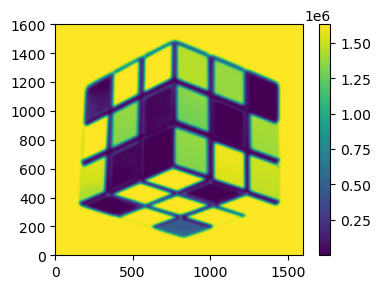

In [55]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(inv_xy, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()
#plt.savefig("sigma8.png")

### Using scipy

In [56]:
import scipy.ndimage as sn

In [64]:
# Original image -> image_3

smooth_im3 = sn.gaussian_filter(image_3, 20)

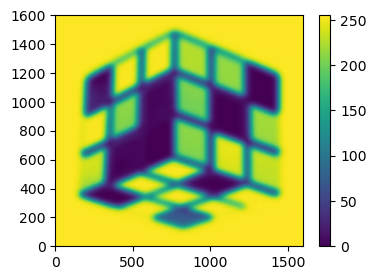

In [65]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(smooth_im3, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()
#plt.savefig("sigma8.png")